<a href="https://colab.research.google.com/github/AdityaMetkar/Cat-Dog-CNN-Classifier/blob/main/CNN_Cat_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Initial Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Set Memory Limit to GPUs

gpus = tf.config.experimental.list_physical_devices('GPU')
for item in gpus:
  tf.config.experimental.set_memory_growth(item, True)

In [4]:
# Print available GPUS

gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [ ]:
!unzip /content/cats.zip -d /content/data/cats

In [ ]:
!unzip /content/dogs.zip -d /content/data/dogs

In [8]:
main_folder = 'data'
main_folder = '/content/data' #for colab

# 2. Filter Unwanted Images

In [9]:
types=set(['jpeg','jpg','png'])

for folder in os.listdir(main_folder):
  for img in os.listdir(os.path.join(main_folder,folder)):

    path= os.path.join(main_folder,folder,img)
    extension=imghdr.what(path)

    if(extension not in types):
      os.remove(path)
      print("Removed - ",path)

Removed -  /content/data/dogs/GettyImages-1205998407-e1624731290663.jpg
Removed -  /content/data/dogs/German-Shepherd-dog-Alsatian.jpg
Removed -  /content/data/dogs/Positive-Dogs_Home_Reward-based-Training_Wynter.jpeg
Removed -  /content/data/dogs/labradoodle-dog-stick-running-grass.jpg
Removed -  /content/data/dogs/beagle-hound-dog.jpg
Removed -  /content/data/dogs/dog-begging-732x549-thumbnail-732x549.jpg
Removed -  /content/data/dogs/essay-final-gettyimages-685469924.jpg
Removed -  /content/data/dogs/8c3b782d1ea3f59990ab7f887bc4dd9112-movie-dogs.jpg
Removed -  /content/data/dogs/skynews-dogs-research-study_5498490.jpg
Removed -  /content/data/dogs/teddybear-dog-breeds.jpg
Removed -  /content/data/dogs/800px-French_Bulldog_with_puppies.jpg
Removed -  /content/data/cats/pallas-cat-1-250-384.webp
Removed -  /content/data/cats/800px-Feral_cat_Virginia_crop.jpg
Removed -  /content/data/cats/Persian-cat-sleeping.jpg
Removed -  /content/data/cats/black-cat-back.jpg
Removed -  /content/data

# 3. Dataset Creation

<h4>Manually</h4>

In [166]:
cats = [cv2.imread(os.path.join(main_folder, 'cats', i)) for i in os.listdir(os.path.join(main_folder, 'cats'))]
dogs = [cv2.imread(os.path.join(main_folder, 'dogs', i)) for i in os.listdir(os.path.join(main_folder, 'dogs'))]


In [214]:
for folder in [cats,dogs]:
  for i,img in enumerate(folder):
    folder[i]=cv2.resize(img,(256,256))
    # folder[i]=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [215]:
np.array(cats[0]).shape

(256, 256)

In [216]:
cats_labels = np.zeros(len(cats))  # 0 represents cats
dogs_labels = np.ones(len(dogs))   # 1 represents dogs

# Combine images and labels
cat_data = list(zip(cats, cats_labels))
dog_data = list(zip(dogs, dogs_labels))

# Combine cat and dog data
final_data = cat_data + dog_data

# Shuffle the data
np.random.shuffle(final_data)

# Separate images and labels
images, labels = zip(*final_data)

# Convert to NumPy arrays
x = np.array(images, dtype='float32')
y = np.array(labels, dtype='float32')


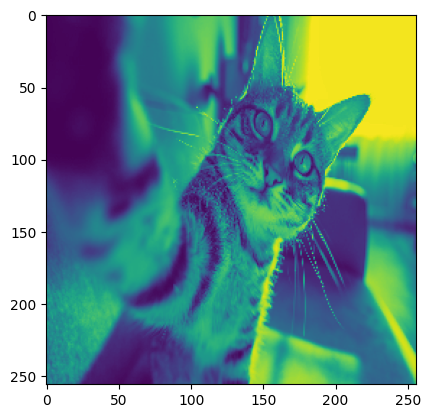

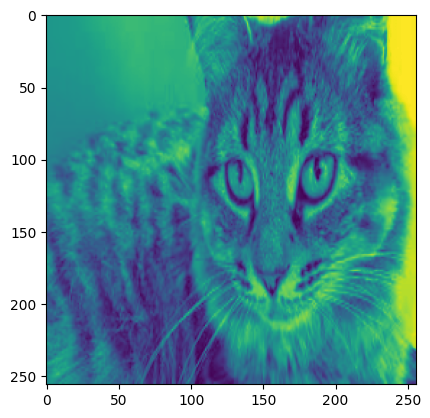

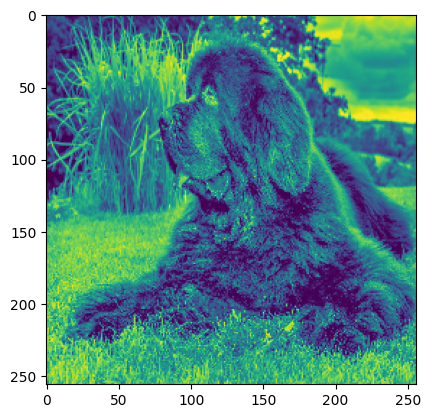

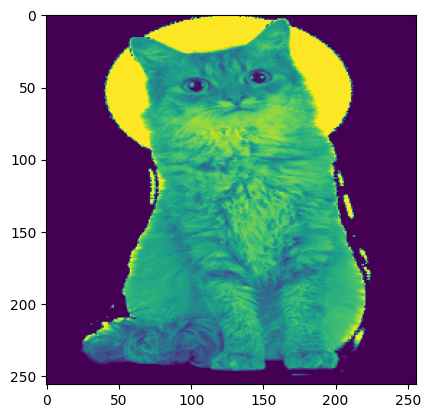

In [232]:
for idx in range(4):
    plt.imshow(x[idx])
    plt.show()

<h4> Using Keras Pipeline</h4>

In [181]:
data= tf.keras.utils.image_dataset_from_directory(main_folder)
data.class_names

Found 285 files belonging to 2 classes.


['cats', 'dogs']

In [182]:
# Convert dataset into iterable

dataset= data.as_numpy_iterator()
dataset

In [183]:
# Fetch a batch of the dataset

batch= dataset.next()

print('Values are of the form [image,label]')
print('Images - ',batch[0].shape)
print('Labels - ',batch[1].shape)

Values are of the form [image,label]
Images -  (32, 256, 256, 3)
Labels -  (32,)


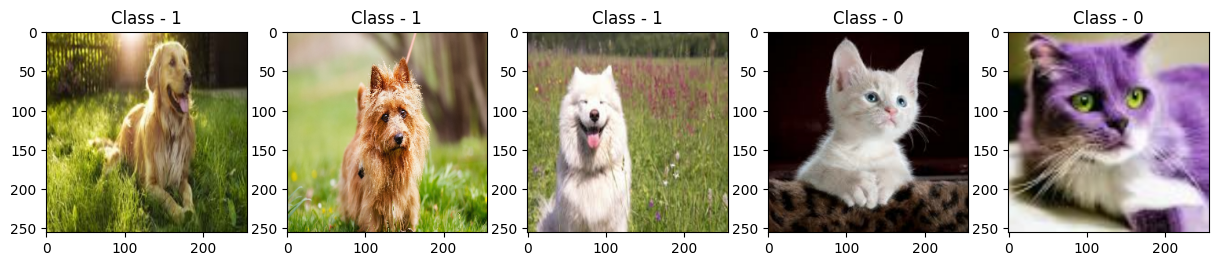

In [111]:
figure, axes = plt.subplots(figsize=(15,15), ncols=5)

for i,img in enumerate(batch[0][:5]):

  axes[i].title.set_text(f"Class - {batch[1][i]}")
  axes[i].imshow(img.astype(int))

# 4. Pre-Processing Images

<h4>4.1 Scale Images (Normalize)

<h4>4.2 Split Data</h4>

In [184]:
data=data.map(lambda x,y : (x/255,y))

In [185]:
print('Total number Pipeline of Batches',len(data))
print('Total number of manual datapoints',len(x_train))

Total number Pipeline of Batches 9
Total number of manual datapoints 286


In [188]:
31*6

186

186

In [217]:
#manual splitting

x_train = x[:186]
y_train = y[:186]
x_val = x[186:248]
y_val = y[186:248]
x_test = x[248:]
y_test = y[248:]

In [94]:
train = data.take(6)
val = data.skip(6).take(2)
test = data.skip(8).take(1)

# 5. Model

In [260]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

<h4>5.1 Create Model Architecture</h4>

In [261]:
# Using the VGG16 Architecture

def CNN():

    model = Sequential()


    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,1)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output before the fully connected layers
    model.add(Flatten())

    # Dense (fully connected) layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    # Output layer with softmax activation for classification
    model.add(Dense(1, activation='sigmoid'))


    return model

In [262]:
model = CNN()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [263]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 128)     

<h4>5.2 Train Model</h4>

In [264]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [265]:
graph = model.fit(x_train, y_train, epochs=10, validation_data=(x_val,y_val), callbacks=[es,mc])

Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 594.9805 - accuracy: 0.4839
Epoch 1: val_accuracy improved from -inf to 0.53226, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 39s 6s/step - loss: 594.9805 - accuracy: 0.4839 - val_loss: 13.8172 - val_accuracy: 0.5323
Epoch 2/10
6/6 [==============================] - ETA: 0s - loss: 43.1252 - accuracy: 0.4892
Epoch 2: val_accuracy did not improve from 0.53226
6/6 [==============================] - 30s 5s/step - loss: 43.1252 - accuracy: 0.4892 - val_loss: 0.6984 - val_accuracy: 0.4839
Epoch 3/10
6/6 [==============================] - ETA: 0s - loss: 2.5853 - accuracy: 0.4731
Epoch 3: val_accuracy did not improve from 0.53226
6/6 [==============================] - 28s 5s/step - loss: 2.5853 - accuracy: 0.4731 - val_loss: 0.6933 - val_accuracy: 0.5161
Epoch 4/10
6/6 [==============================] - ETA: 0s - loss: 0.7846 - accuracy: 0.5108
Epoch 4: val_accuracy did not improve from 0.53226
6/6 [==============================] - 28s 5s/step - loss: 0.7846 - accuracy: 0.5108 - val_loss: 0.6933 - val_accuracy: 0.4677
Epoch 5/10
6/6 [==============================] - ETA: 0s 

<h4>5.3 Plot Performance</h4>

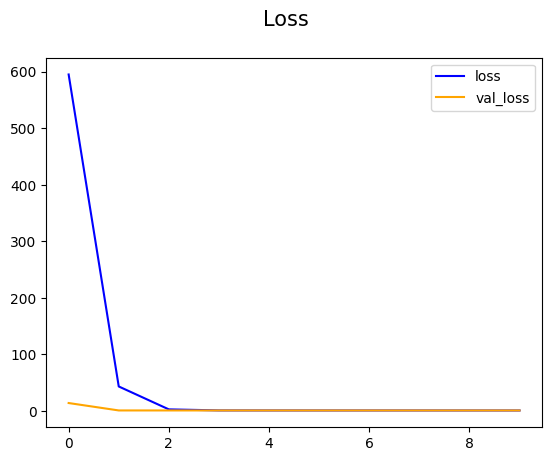

In [266]:
fig = plt.figure()
plt.plot(graph.history['loss'] , color='blue' , label='loss')
plt.plot(graph.history['val_loss'] , color='orange' , label='val_loss')
plt.suptitle('Loss', fontsize=15)
plt.legend(loc="upper right")
plt.show()

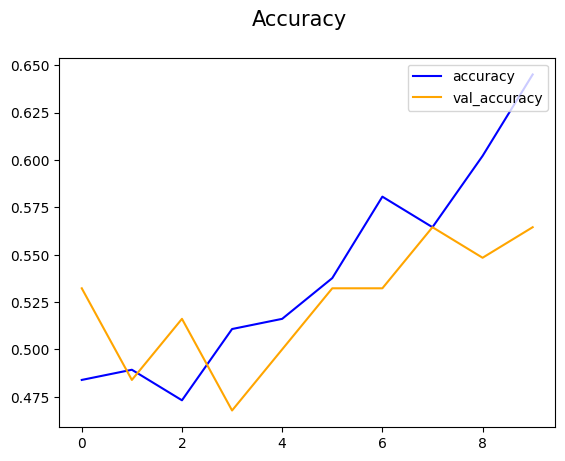

In [267]:
fig = plt.figure()
plt.plot(graph.history['accuracy'] , color='blue' , label='accuracy')
plt.plot(graph.history['val_accuracy'] , color='orange' , label='val_accuracy')
plt.suptitle('Accuracy', fontsize=15)
plt.legend(loc="upper right")
plt.show()

# Performance Evaluation

In [272]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [277]:
predictions = [1 if i >= 0.5 else 0 for i in model.predict(x_test)]

2/2 [==============================] - 1s 211ms/step


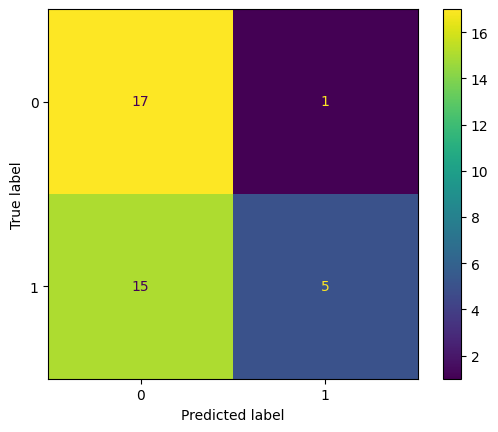


Accuracy of the classifier is: 0.5789473684210527
Precision Score of the classifier is: 0.8333333333333334
Recall Score of the classifier is: 0.25
F1 Score of the classifier is: 0.3846153846153846


In [288]:
cm=confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(f"\nAccuracy of the classifier is: {accuracy_score(y_test, predictions)}")
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

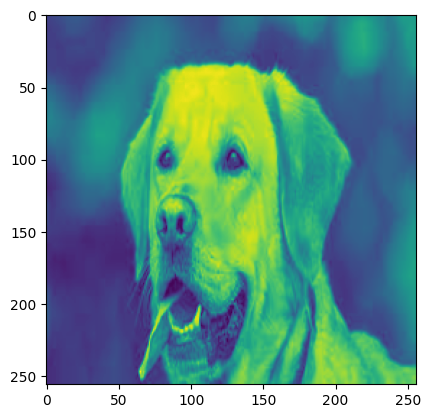

1/1 [==============================] - 0s 101ms/step
Predicted Result -  Dog


In [269]:
img = cv2.imread("/content/sample 1.jpg")

resize=cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (256,256))

plt.imshow(resize.astype('uint8'))
plt.show()
result = model.predict(np.expand_dims(resize,0))
print("Predicted Result - ","Dog" if result>=0.5 else "Cat")

# Save Model?

In [289]:
from tensorflow.keras.models import load_model

In [290]:
model.save("DogCat.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [291]:
new_model = load_model("DogCat.h5")

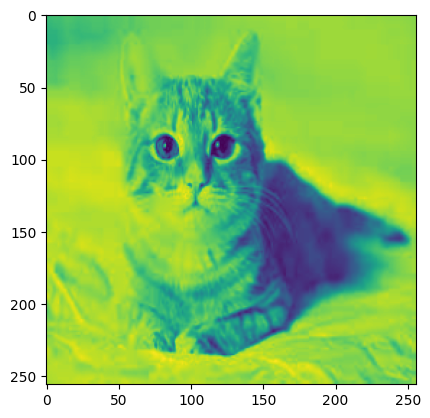

1/1 [==============================] - 0s 69ms/step
Predicted Result -  Cat


In [293]:
img = cv2.imread("/content/sample.jpg")

resize=cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (256,256))

plt.imshow(resize.astype('uint8'))
plt.show()
result = new_model.predict(np.expand_dims(resize,0))
print("Predicted Result - ","Dog" if result>=0.5 else "Cat")